# IBM Capstone Project - Car accident severity

___

### Links to additional materials (report, EDA, notebooks):

#### [Report](https://docs.google.com/document/d/1_MLOVZuu2qlb-eaQAgipBb0xhjxAYsckmJyfeXNwPWk/edit?usp=sharing)

#### [The 1st Week notebook](https://github.com/kolasdevpy/CapstoneProjectIBM/blob/master/Capstone%20Project%20%20-%201st%20Week%20-%20Car%20accident%20severity.ipynb)

#### [The 2nd Week notebook](https://github.com/kolasdevpy/CapstoneProjectIBM/blob/master/IBM%20Capstone%20Project%20-%202nd%20Week%20-%20Car%20accident%20severity.ipynb)

#### [Exploratory Data Analysis](https://docs.google.com/presentation/d/1Y8D7zr4rDytsLZ_8Om-0SyzZ9B6L7b6XOeh3TsbACkY/edit?usp=sharing)

____

# The 1st Week

### Tasks
1) Clearly define a problem or an idea of your choice. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.
This submission will eventually become your Introduction/Business Problem section in your final report. So I recommend that you push the report (having your Introduction/Business Problem section only for now) to your Github repository and submit a link to it.

2) Describe the data that you will be using to solve the problem or execute your idea. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using.
This submission will eventually become your Data section in your final report. So I recommend that you push the report (having your Data section) to your Github repository and submit a link to it.

____ 

# Introduction / Business Problem


This data allows us to build a model for predicting whether the car crash participants (car drivers or pedestrians) require increased amount of medical care or not. The data covers Seatle, WA. The primary focus of the model is to prioritize help for different points of the city for better balance of injury and help amount. The more injury - more help.   

For example, the Seattle Police department has limited number of helicopters for the medical purposes and prosecution of criminals. And in the case of simultaneously happening crashes, the model could possibly help to choose the way of dealing with the problems, predicting the amount of damage in all cases.   
   
We already have the collected incident data. We need to understand and describe the data.   
Next, we need to understand which part of all the data we will use.   
   
        
To do this, we need to build a model that can determine the need for a medical helicopter in an accident. It's a Discrete value.   
Since we have a Classification problem.   
   

___

## Data Source
 
 #### Description
 
 https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf
 
 #### Data
 
 https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

____

# Exploratory Data Analysis and Data Description

## Downloading and Reading Data

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np 
path = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(path)
df.head(2)

/Users/artyomkolas/opt/anaconda3/envs/ibm/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


## Data Understanding

In [2]:
df.shape

(194673, 38)

In [3]:
df[-2:]

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N
194672,1,-122.289360,47.611017,219547,308220,309500,E868008,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N


In [4]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
df.describe(include = 'all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [6]:
df.info

<bound method DataFrame.info of         SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.306426  47.545739         5   17700      17700   
...              ...         ...        ...       ...     ...        ...   
194668             2 -122.290826  47.565408    219543  309534     310814   
194669             1 -122.344526  47.690924    219544  309085     310365   
194670             2 -122.306689  47.683047    219545  311280     312640   
194671             2 -122.355317  47.678734    219546  309514     310794   
194672             1 -122.289360  47.611017    219547  308220     309500   

       REPORTNO   STATUS      ADDRTYPE   INTKEY  ... RO

In [7]:
df.replace("?", np.nan, inplace = True)
df.head(2)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


In [8]:
missing_data = df.isnull() # True - null data (NaN, 0)
missing_data.head(2)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False


In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

## Data Understanding and Pre-Processing



<h3 id="deal_missing_values">Deal with missing data</h3>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

In [10]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [11]:
df['SEVERITYCODE'].value_counts(dropna=False) #   A code that corresponds to the severity of the collision:
                                              #   1—property damage
                                              #   2—injury
                                              #   _____ target _____

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [12]:
df['X'].value_counts(dropna=False)           # X Coordinate - Useful data
                                             # - Useful data

 NaN           5334
-122.332653     265
-122.344896     254
-122.328079     252
-122.344997     239
               ... 
-122.328299       1
-122.296699       1
-122.273686       1
-122.288670       1
-122.322090       1
Name: X, Length: 23564, dtype: int64

In [13]:
# simply drop whole row with NaN in column
df.dropna(subset=['X'], axis=0, inplace=True)
# reset index, because we droped some rows
df.reset_index(drop=True, inplace=True)

df['X'].value_counts(dropna=False)  

-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: X, Length: 23563, dtype: int64

In [14]:
df['Y'].value_counts(dropna=False)           # Y Coordinate - Useful data
                                             #      - Useful data

47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: Y, Length: 23839, dtype: int64

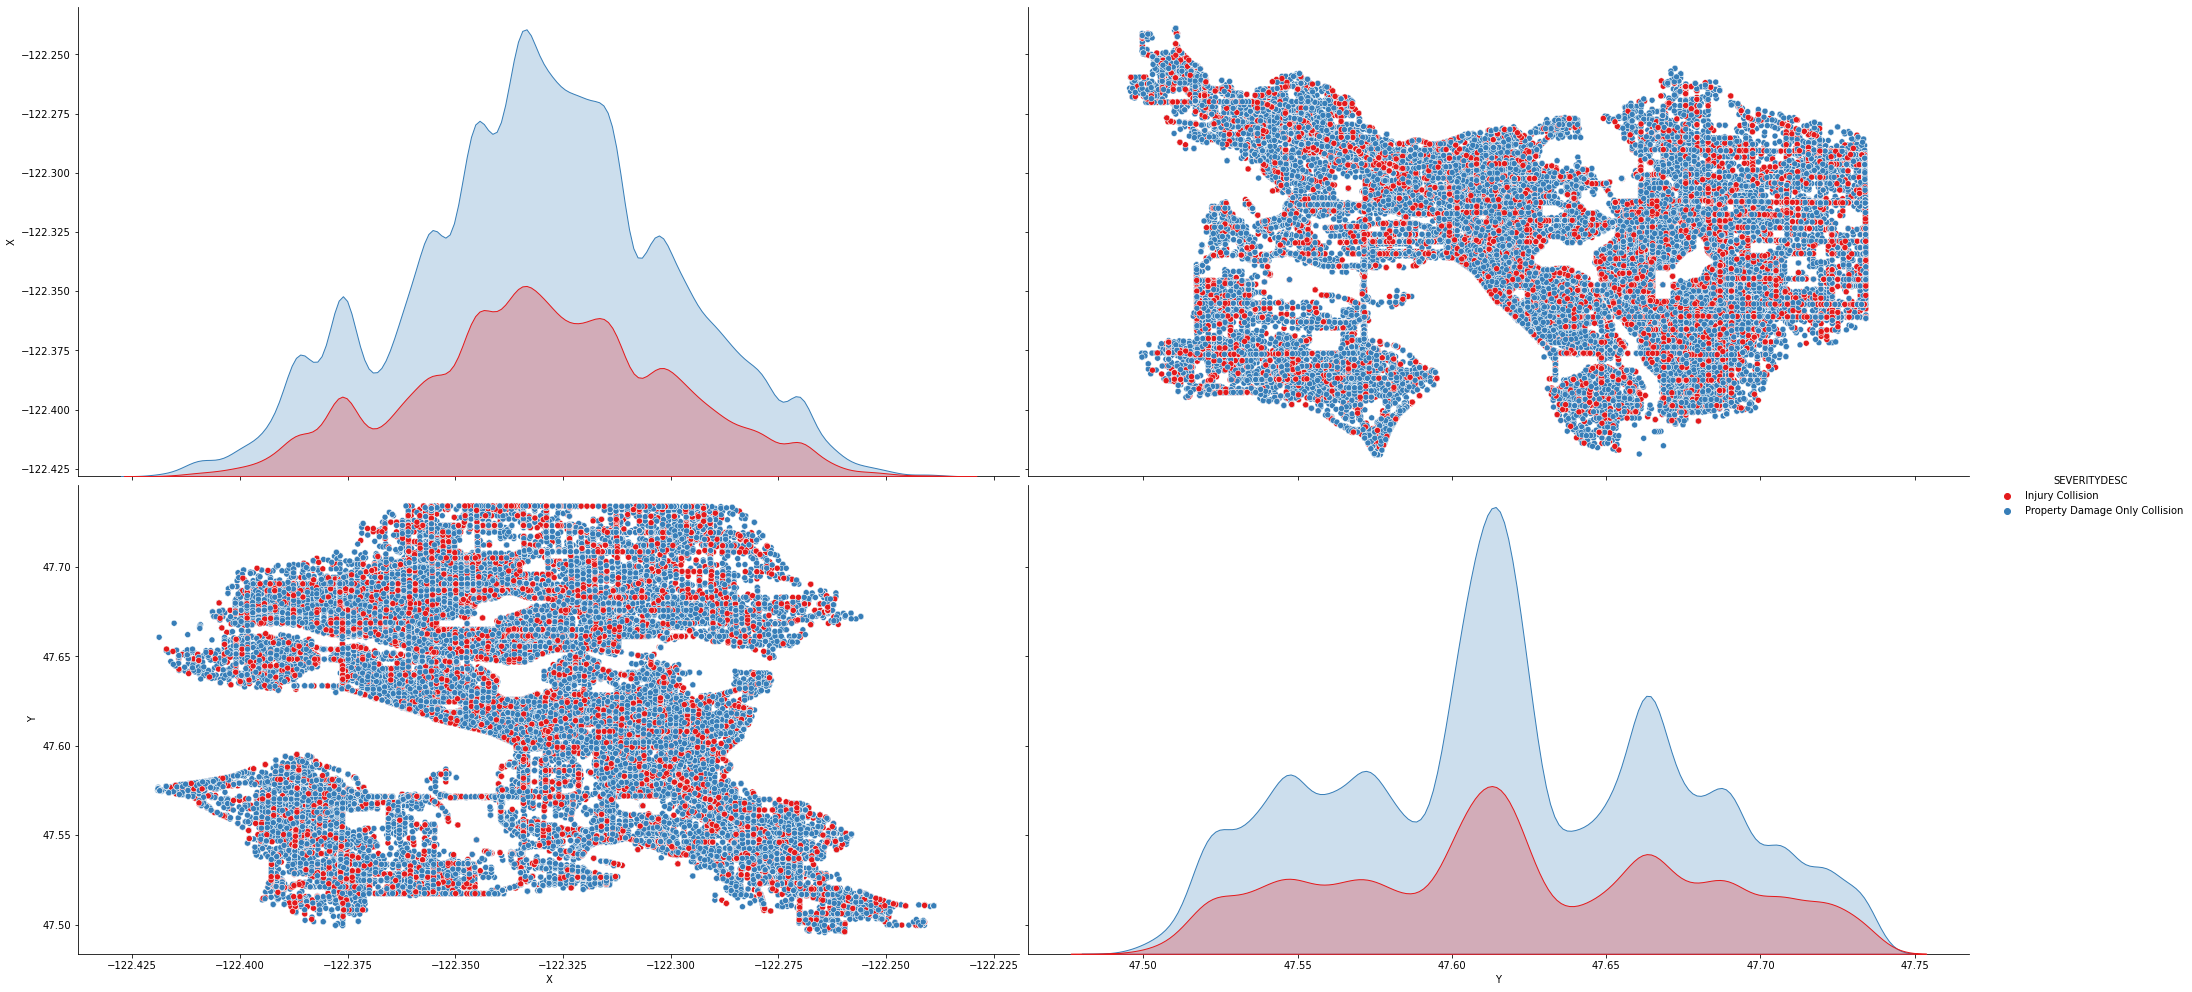

In [15]:
plot_data = df[['SEVERITYDESC', 'X', 'Y']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [16]:
# df['OBJECTID'].value_counts(dropna=False)  #     ESRI unique identifier
#                                            #     - Useless data (probably)

In [17]:
# df['INCKEY'].value_counts(dropna=False)    #  A unique key for the incident
#                                            #  - Useless data (probably)

In [18]:
# df['COLDETKEY'].value_counts(dropna=False) #   Secondary key for the incident
#                                            #   - Useless data (probably)

In [19]:
# df['REPORTNO'].value_counts(dropna=False) #    Report number
#                                           #    Useless data (probably)

In [20]:
# df['STATUS'].value_counts(dropna=False) #      Without description
#                                         #      - Useless data

In [21]:
# df['STATUS'].replace(to_replace="Matched", value=1, inplace=True)
# df['STATUS'].replace(to_replace="Unmatched", value=0, inplace=True)

# df['STATUS'] = df['STATUS'].astype("int")

# df['STATUS'].value_counts(dropna=False)

### We could use LabelEncoder to categorize values. But I chose to do it step by step.

In [22]:
df['ADDRTYPE'].value_counts(dropna=False) #      Collision address type:
                                                    # • Alley
                                                    # • Block
                                                    # • Intersection
            
                                          #      - Useful data

Block           124591
Intersection     64748
Name: ADDRTYPE, dtype: int64

In [23]:
df['ADDRTYPE'].replace(to_replace="Block", value=0, inplace=True)
df['ADDRTYPE'].replace(to_replace="Intersection", value=1, inplace=True)

df['ADDRTYPE'] = df['ADDRTYPE'].astype("int")

df['ADDRTYPE'].value_counts(dropna=False)

0    124591
1     64748
Name: ADDRTYPE, dtype: int64

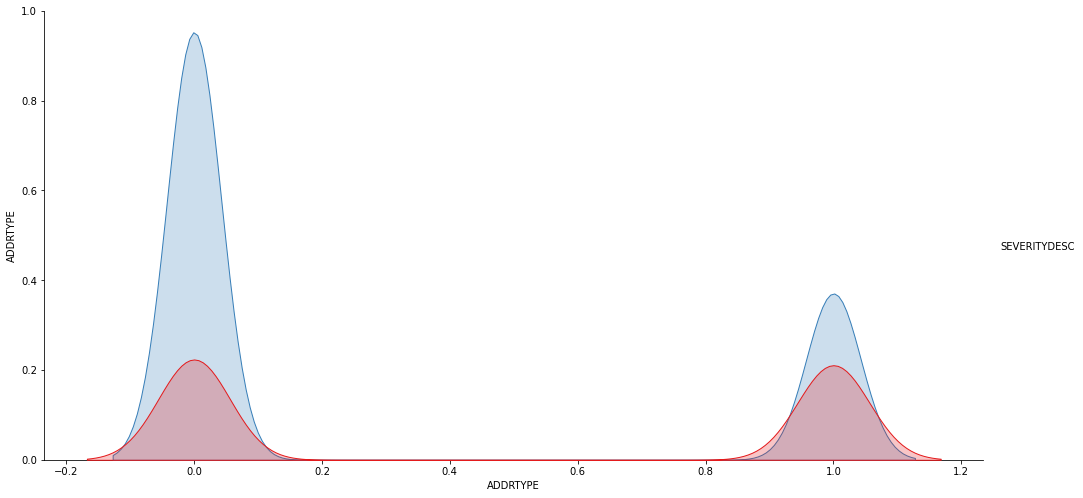

In [24]:
plot_data = df[['SEVERITYDESC', 'ADDRTYPE']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [25]:
df['INTKEY'].value_counts(dropna=False) #       Key that corresponds to the intersection associated with a collision

                                        #       We can draw the attention of Seattle authorities to problem intersections
                                        #       - Useful data

NaN        124591
29973.0       252
29933.0       160
29913.0       138
29549.0       136
            ...  
31144.0         1
36782.0         1
36781.0         1
26580.0         1
31226.0         1
Name: INTKEY, Length: 7516, dtype: int64

In [26]:
df['INTKEY'].replace(np.nan, 0, inplace=True)

df[['INTKEY']] = df[['INTKEY']].astype("int")

df['INTKEY'].value_counts(dropna=False) 

0         124591
29973        252
29933        160
29913        138
29549        136
           ...  
28103          1
337518         1
24257          1
25025          1
26356          1
Name: INTKEY, Length: 7516, dtype: int64

In [27]:
# df['LOCATION'].value_counts(dropna=False) #       Description of the general location of the collision

#                                           #       We can draw the attention of Seattle authorities to problem locations
#                                           #       - Useless data(we already have coordinates)

In [28]:
# df['EXCEPTRSNCODE'].value_counts(dropna=False)  #      No description
#                                                 #      (duplicate data of below column)
    
#                                                 #      - Useless data (duplicate data of ['EXCEPTRSNDESC'])

In [29]:
# df['EXCEPTRSNDESC'].value_counts(dropna=False) #       No description

#                                                #       - Useless data

In [30]:
# df['SEVERITYCODE.1'].value_counts(dropna=False) #  A code that corresponds to the severity of the collision:
#                                                 #  1—prop damage
#                                                 #  2—injury
         
#                                                 #  Useless data (duplicate data of our target)  

In [31]:
# df['SEVERITYDESC'].value_counts(dropna=False) #    A detailed description of the severity of the collision
#                                               #    - Useless data (Duplicate data of target)

In [32]:
# df['SEVERITYDESC'] = df['SEVERITYDESC'].astype("category")
# df['SEVERITYDESC'].value_counts(dropna=False)

In [33]:
df['INCDATE'] = df['INCDATE'].astype("datetime64")
df['INCDATE'].value_counts(dropna=False)

2006-11-02    88
2008-10-03    85
2005-05-18    83
2005-11-05    82
2006-01-13    77
              ..
2020-05-18     2
2020-05-19     1
2015-12-25     1
2020-05-17     1
2020-05-20     1
Name: INCDATE, Length: 5985, dtype: int64

In [34]:
df['year'] = pd.DatetimeIndex(df['INCDATE']).year
df['year'].value_counts(dropna=False)

2006    14816
2005    14760
2007    14036
2008    13170
2015    12434
2004    11568
2014    11486
2016    11325
2009    11312
2012    10616
2011    10602
2017    10578
2010    10533
2013    10314
2018    10224
2019     9334
2020     2231
Name: year, dtype: int64

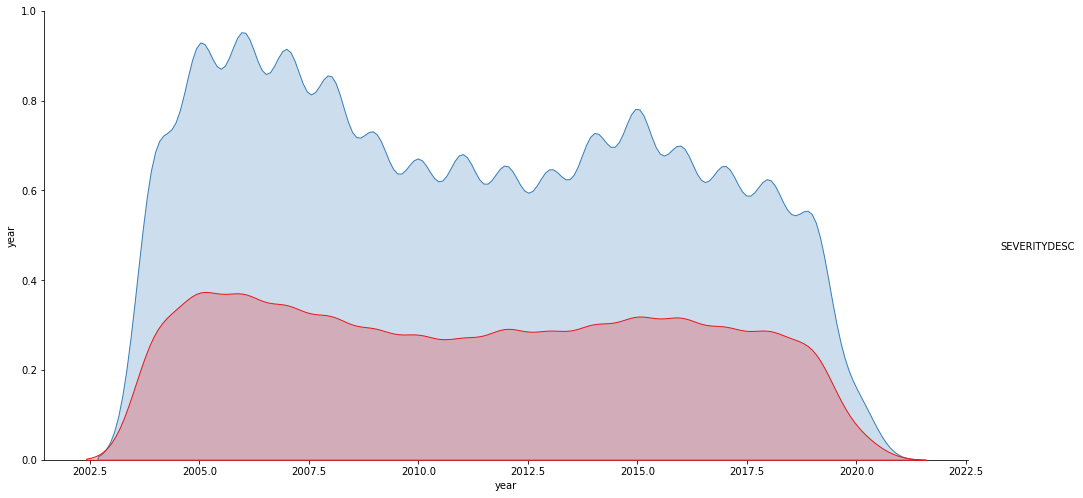

In [35]:
plot_data = df[['SEVERITYDESC','year']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [36]:
df['month'] = pd.DatetimeIndex(df['INCDATE']).month
df['month'].value_counts(dropna=False)

10    17231
5     16304
6     16110
11    16063
1     15974
7     15935
8     15875
3     15691
4     15537
9     15492
12    15089
2     14038
Name: month, dtype: int64

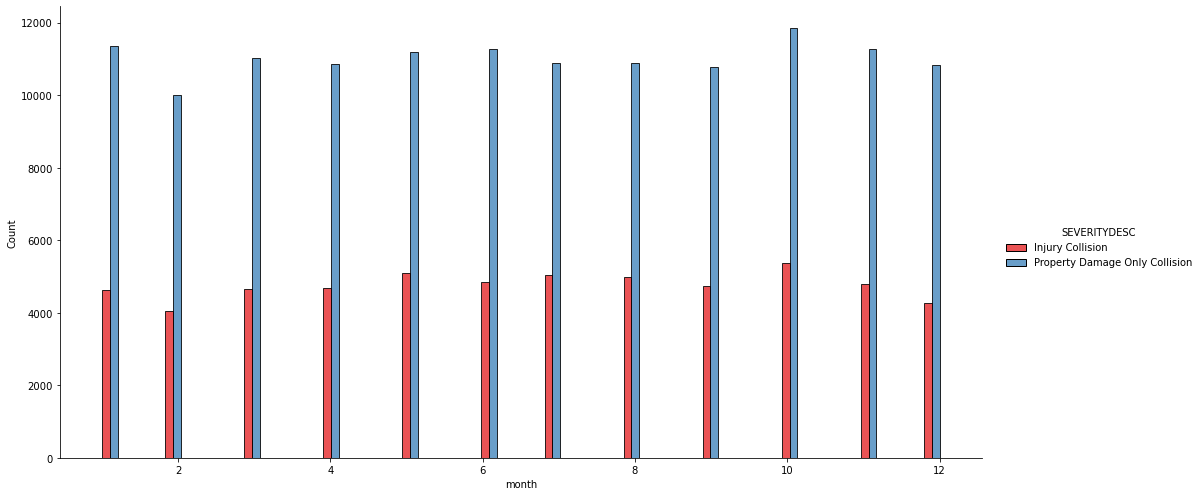

In [37]:
plot_data = df[['SEVERITYDESC','month']]
sns.displot(plot_data, x='month', hue='SEVERITYDESC', palette='Set1', height=7, aspect=2, multiple="dodge")

In [38]:
df['day'] = pd.DatetimeIndex(df['INCDATE']).day
df['day'].value_counts(dropna=False)

15    6497
5     6420
1     6398
20    6356
13    6349
8     6347
10    6334
9     6307
6     6292
2     6290
12    6283
14    6272
7     6262
18    6247
3     6239
22    6209
11    6207
28    6202
21    6186
19    6181
23    6171
17    6168
4     6165
16    6138
27    6115
26    5992
24    5888
25    5775
29    5715
30    5619
31    3715
Name: day, dtype: int64

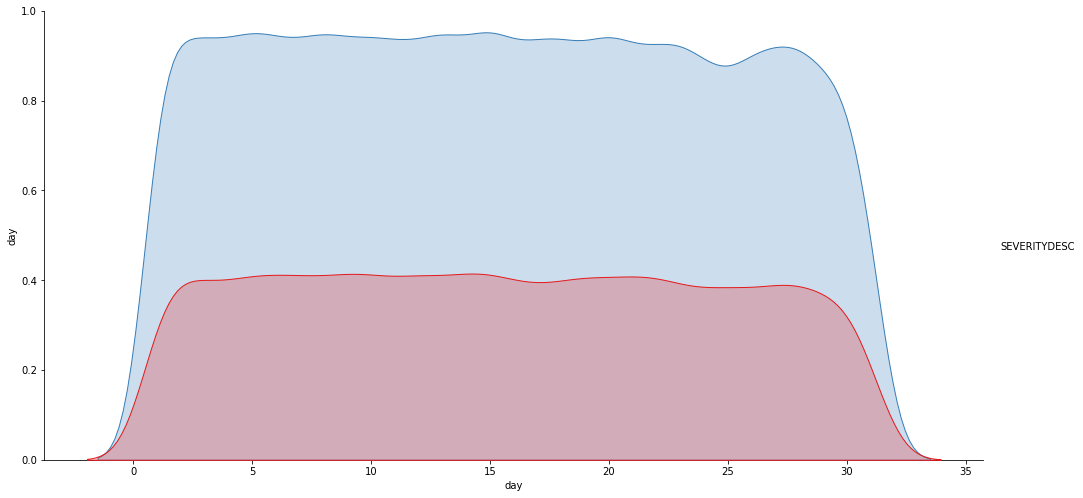

In [39]:
plot_data = df[['SEVERITYDESC','day']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [40]:
df['weekday_name'] = df['INCDATE'].dt.dayofweek
df['weekday_name'].value_counts(dropna=False)

4    31424
3    28525
2    27992
1    27767
5    26674
0    25628
6    21329
Name: weekday_name, dtype: int64

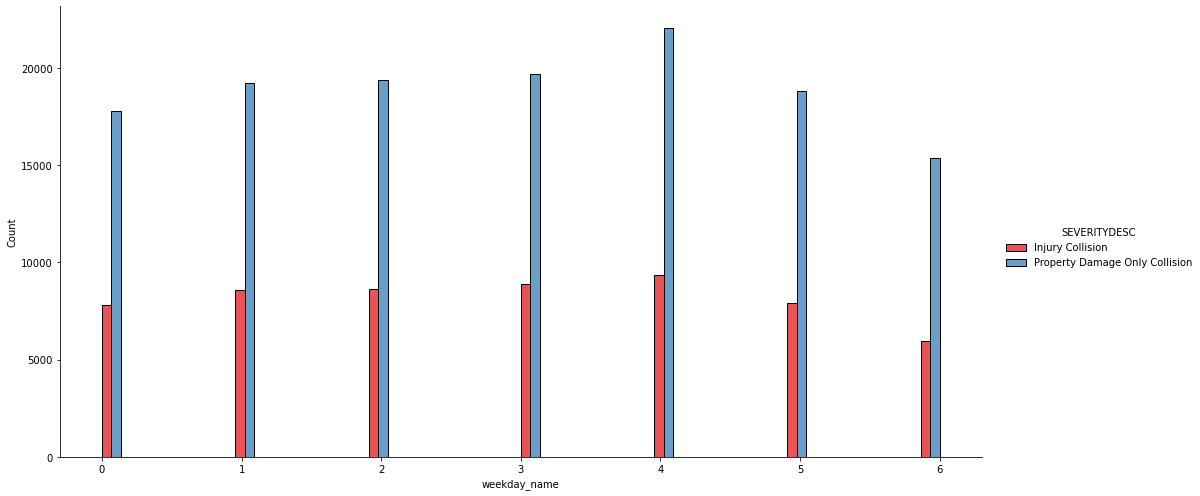

In [41]:
plot_data = df[['SEVERITYDESC','weekday_name']]
sns.displot(plot_data, x='weekday_name', hue='SEVERITYDESC', palette='Set1', height=7, aspect=2, multiple="dodge")

In [42]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'year', 'month', 'day',
       'weekday_name'],
      dtype='object')

In [43]:
df['COLLISIONTYPE'].replace(np.nan, "Other", inplace=True)

<AxesSubplot:xlabel='year', ylabel='count'>

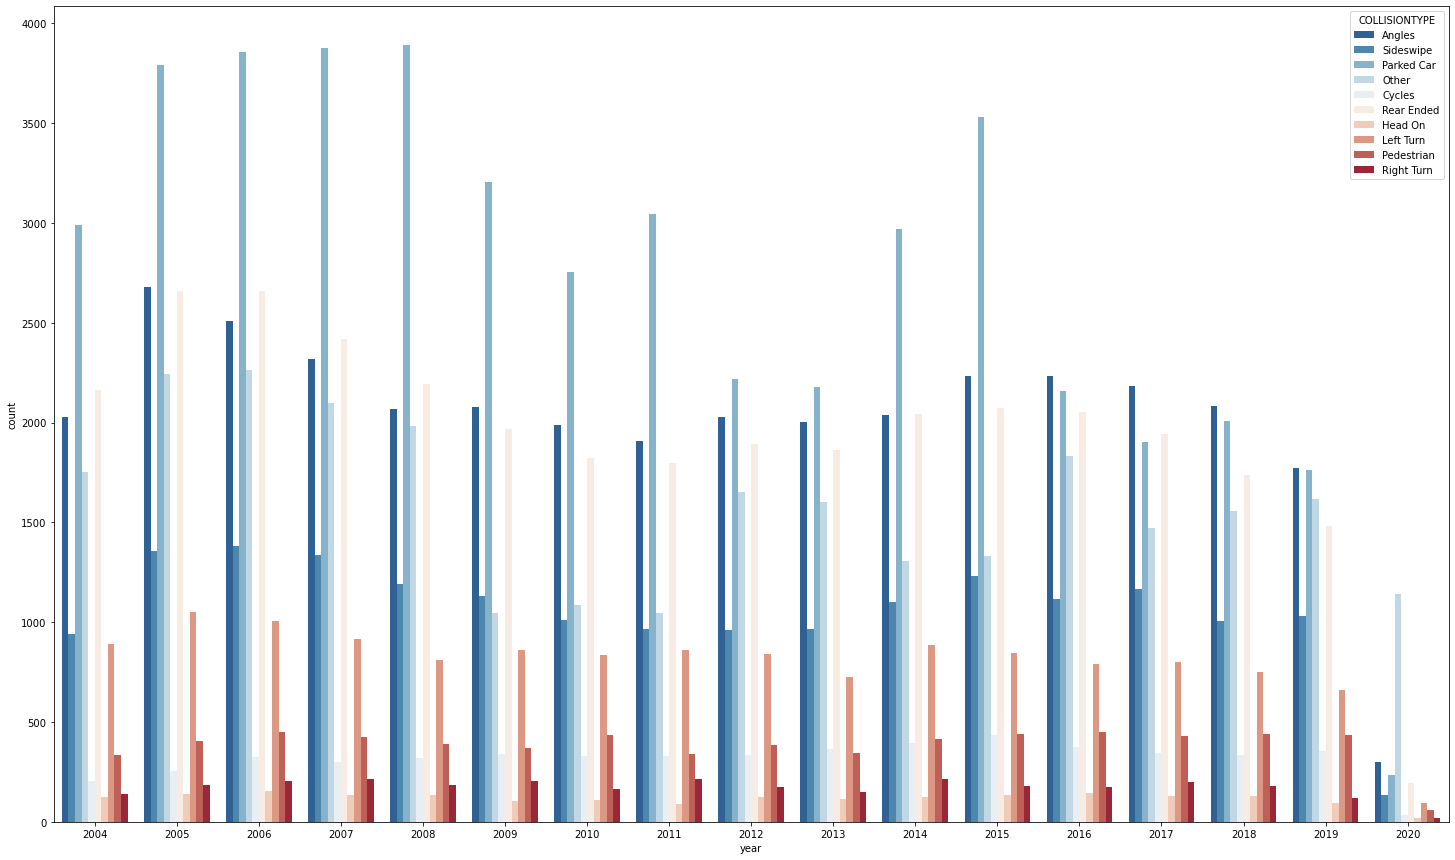

In [44]:
plot_data = df[['COLLISIONTYPE', 'year']]
plt.figure(figsize=(25,15))
sns.countplot(x='year', hue='COLLISIONTYPE', data=plot_data, palette='RdBu_r')

In [45]:
# We could use LabelEncoder to categorize values. But I chose to do it step by step.
df['COLLISIONTYPE'].replace(to_replace="Parked Car", value=0, inplace=True)
df['COLLISIONTYPE'].replace(to_replace="Angles",     value=1, inplace=True)
df['COLLISIONTYPE'].replace(to_replace="Rear Ended", value=2, inplace=True)
df['COLLISIONTYPE'].replace(to_replace="Other",      value=3, inplace=True)
df['COLLISIONTYPE'].replace(to_replace="Sideswipe",  value=4, inplace=True)
df['COLLISIONTYPE'].replace(to_replace="Left Turn",  value=5, inplace=True)
df['COLLISIONTYPE'].replace(to_replace="Pedestrian", value=6, inplace=True)
df['COLLISIONTYPE'].replace(to_replace="Cycles",     value=7, inplace=True)
df['COLLISIONTYPE'].replace(to_replace="Right Turn", value=8, inplace=True)
df['COLLISIONTYPE'].replace(to_replace="Head On",    value=9, inplace=True)

df['COLLISIONTYPE'] = df['COLLISIONTYPE'].astype("int")

df['COLLISIONTYPE'].value_counts(dropna=False)

0    46381
1    34460
2    32968
3    27034
4    18034
5    13624
6     6551
7     5378
8     2912
9     1997
Name: COLLISIONTYPE, dtype: int64

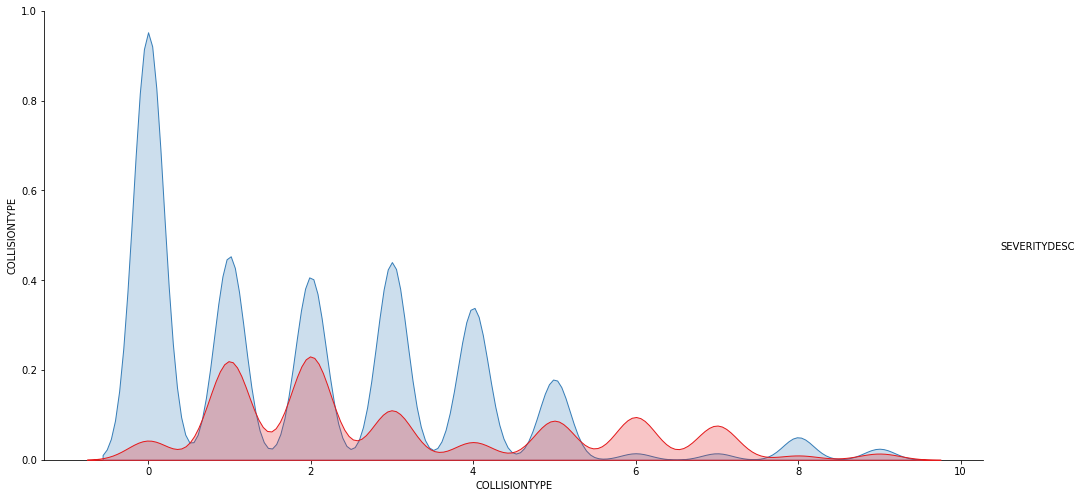

In [46]:
plot_data = df[['SEVERITYDESC', 'COLLISIONTYPE']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [47]:
df['PERSONCOUNT'].value_counts(dropna=False) #    The total number of people involved in the collision
                                             #     - Useful data 

2     110986
3      34964
4      14435
1      12191
5       6473
0       5442
6       2659
7       1101
8        523
9        208
10       128
11        54
12        32
13        21
14        17
15        11
17        11
16         7
18         6
44         6
19         5
20         5
25         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

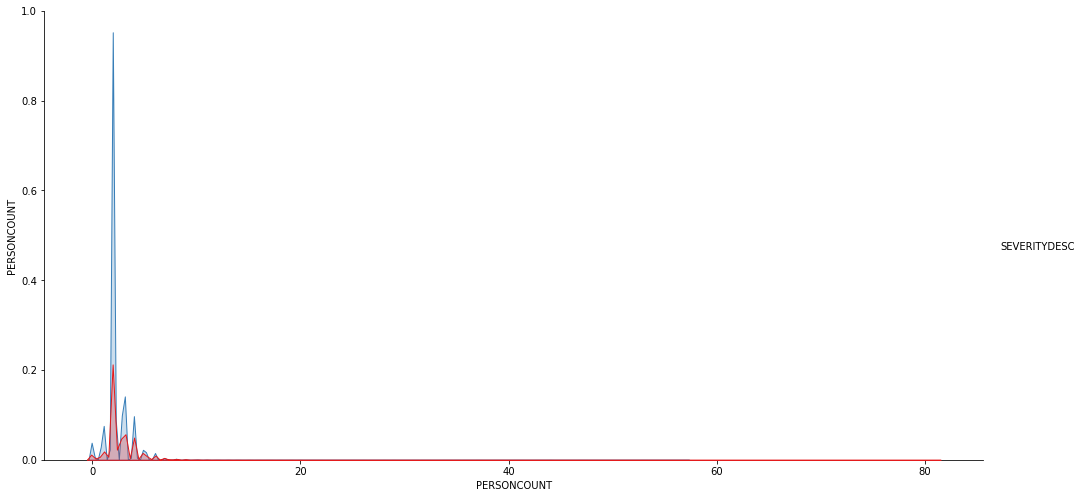

In [48]:
plot_data = df[['SEVERITYDESC', 'PERSONCOUNT']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [49]:
df['PEDCOUNT'].value_counts(dropna=False) # The number of pedestrians involved in the collision.
                                          # - Useful data 

0    182460
1      6626
2       225
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

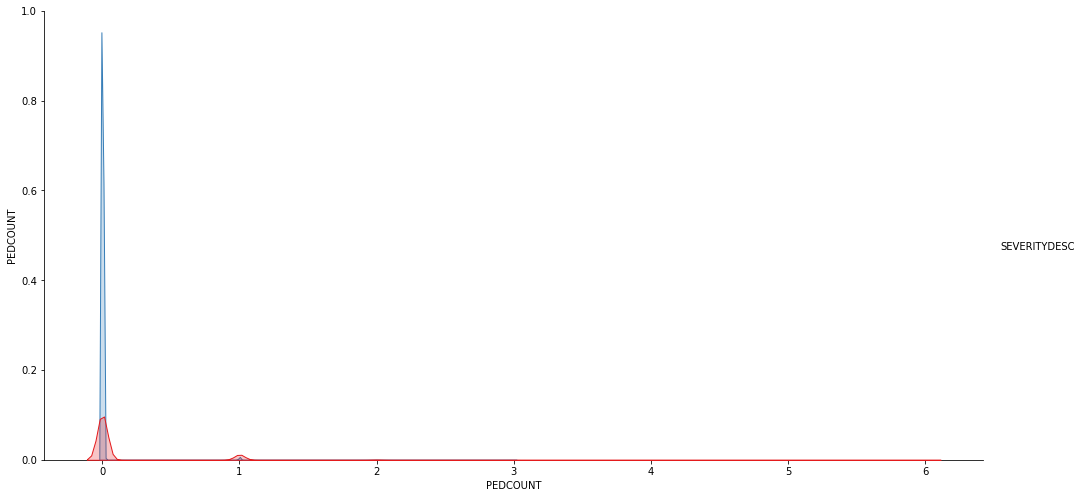

In [50]:
plot_data = df[['SEVERITYDESC', 'PEDCOUNT']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [51]:
df['PEDCYLCOUNT'].value_counts(dropna=False) #  The number of bicycles involved in the collision.
                                             #  - Useful data 

0    183892
1      5404
2        43
Name: PEDCYLCOUNT, dtype: int64

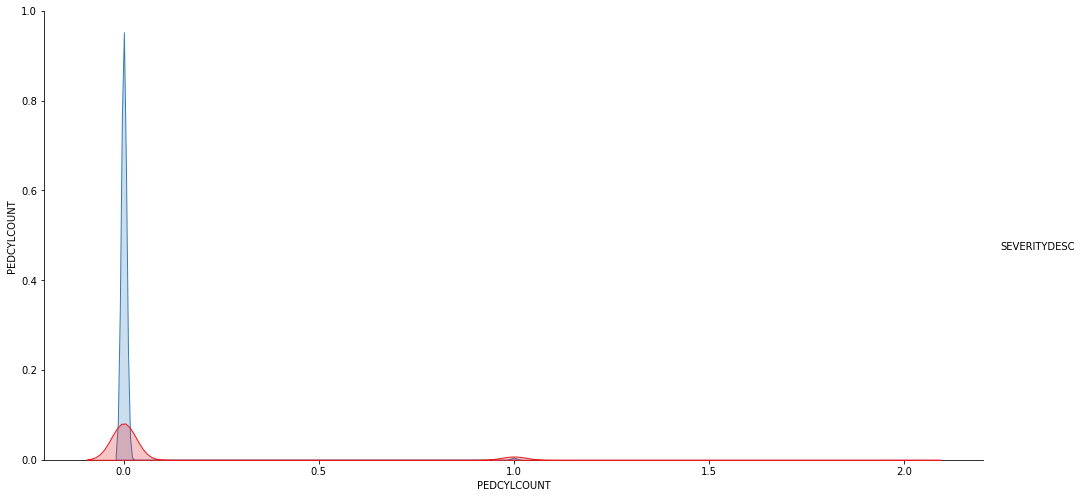

In [52]:
plot_data = df[['SEVERITYDESC', 'PEDCYLCOUNT']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [53]:
df['VEHCOUNT'].value_counts(dropna=False) #   The number of vehicles involved in the collision.
                                          #   - Useful data 

2     143994
1      24557
3      12731
0       4937
4       2381
5        520
6        145
7         42
8         15
9          9
11         5
10         2
12         1
Name: VEHCOUNT, dtype: int64

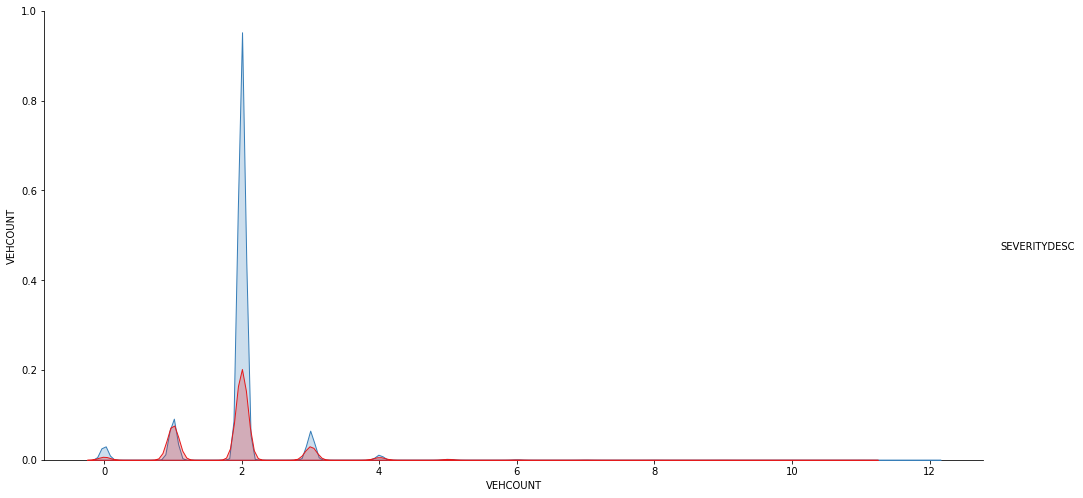

In [54]:
plot_data = df[['SEVERITYDESC', 'VEHCOUNT']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [55]:
df['INCDATE'].value_counts(dropna=False)    #  - Date
                                            #  - Useful data 
                                            #  Convert to new features: ['year'],[month],[day] and ['weekday_name']

2006-11-02    88
2008-10-03    85
2005-05-18    83
2005-11-05    82
2006-01-13    77
              ..
2020-05-18     2
2020-05-19     1
2015-12-25     1
2020-05-17     1
2020-05-20     1
Name: INCDATE, Length: 5985, dtype: int64

In [56]:
df['INCDTTM'].value_counts(dropna=False) #    

11/2/2006                88
10/3/2008                85
11/5/2005                82
12/4/2004                72
6/1/2006                 70
                         ..
8/4/2015 3:54:00 PM       1
5/31/2005 4:54:00 PM      1
3/29/2014 12:39:00 PM     1
9/7/2014 7:30:00 AM       1
1/26/2017 4:02:00 PM      1
Name: INCDTTM, Length: 157960, dtype: int64

In [57]:
df['INCDTTM'] = df['INCDTTM'].astype("datetime64") # - DateTime
                                                   # - Useful data 
print(df['INCDTTM'].value_counts(dropna=False))    # Convert to new features: ['hour'] and ['minute']

2006-11-02 00:00:00    88
2008-10-03 00:00:00    85
2005-11-05 00:00:00    82
2004-12-04 00:00:00    72
2006-06-01 00:00:00    70
                       ..
2004-06-19 17:06:00     1
2010-11-22 12:33:00     1
2007-11-23 12:38:00     1
2012-03-29 17:02:00     1
2019-07-12 09:45:00     1
Name: INCDTTM, Length: 157960, dtype: int64


In [58]:
df['hour'] = pd.DatetimeIndex(df['INCDTTM']).hour
df['hour'].value_counts(dropna=False)

0     33349
17    12626
16    11841
15    11238
14    10389
12    10094
13    10003
18     9492
8      8300
11     7990
9      7816
10     7234
19     7085
7      6364
20     6062
21     5433
22     5319
23     4451
2      3481
1      3300
6      3093
3      1603
5      1590
4      1186
Name: hour, dtype: int64

In [59]:
df['minute'] = pd.DatetimeIndex(df['INCDTTM']).minute
df['minute'].value_counts(dropna=False)

0     45958
30    10178
45     5223
15     4961
50     4580
40     4431
20     4415
10     3937
5      3255
55     3207
35     3162
25     3160
1      2424
58     2099
59     2075
54     2050
48     2046
13     2037
53     2016
18     2010
12     2003
8      1995
7      1989
14     1987
52     1987
43     1987
22     1982
44     1978
38     1969
57     1958
23     1954
28     1952
27     1941
37     1934
24     1931
47     1921
42     1911
4      1908
36     1902
17     1891
16     1883
19     1882
2      1880
39     1879
49     1874
11     1872
46     1868
34     1866
41     1866
6      1865
3      1865
9      1852
21     1851
26     1847
56     1846
32     1845
51     1844
29     1825
31     1773
33     1752
Name: minute, dtype: int64

### We can see that we have a lot of zero values in ['minute'] and ['hour'].

I could try <b>delete</b> all raws with value 00:00

### ATTENTION! Next we delete ~30 000 raws (15.6 % of data). 

In [60]:
# df.shape

In [61]:
# df['hour-minute'] = df['hour'].map(str) + '-' + df['minute'].map(str)
# df['hour-minute'].value_counts(dropna=False)

In [62]:
# df.head(2)

In [63]:
# df = df.loc[df['hour-minute'] != '0-0']      # -  delete ~30000 raws
# df.reset_index(drop=True, inplace=True)
# df['hour-minute'].value_counts(dropna=False)   

In [64]:
# del df['hour-minute'] 

In [65]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'year', 'month', 'day',
       'weekday_name', 'hour', 'minute'],
      dtype='object')

In [66]:
# df.shape

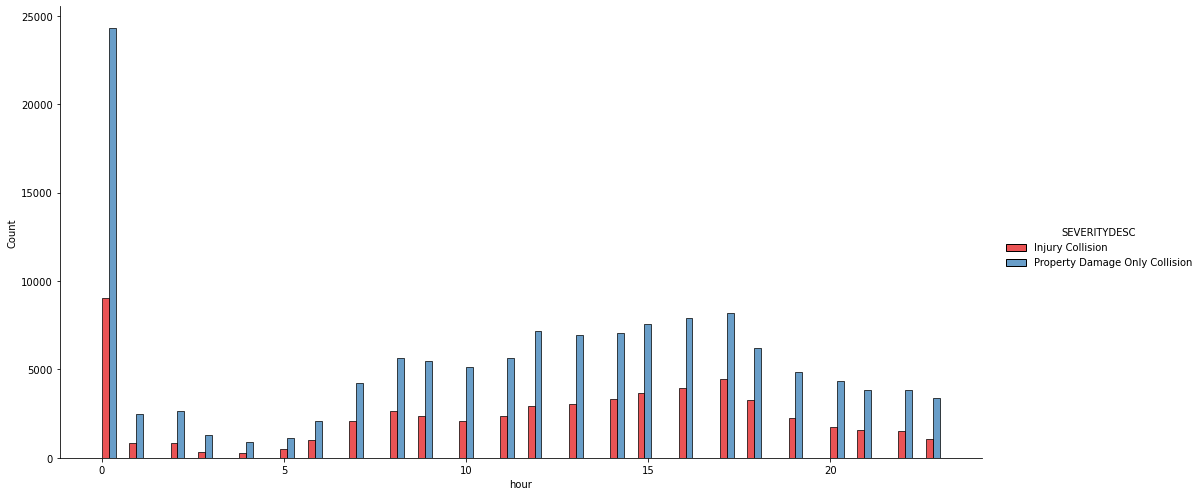

In [67]:
plot_data = df[['SEVERITYDESC','hour']]
sns.displot(plot_data, x='hour', hue='SEVERITYDESC', palette='Set1', height=7, aspect=2, multiple="dodge")

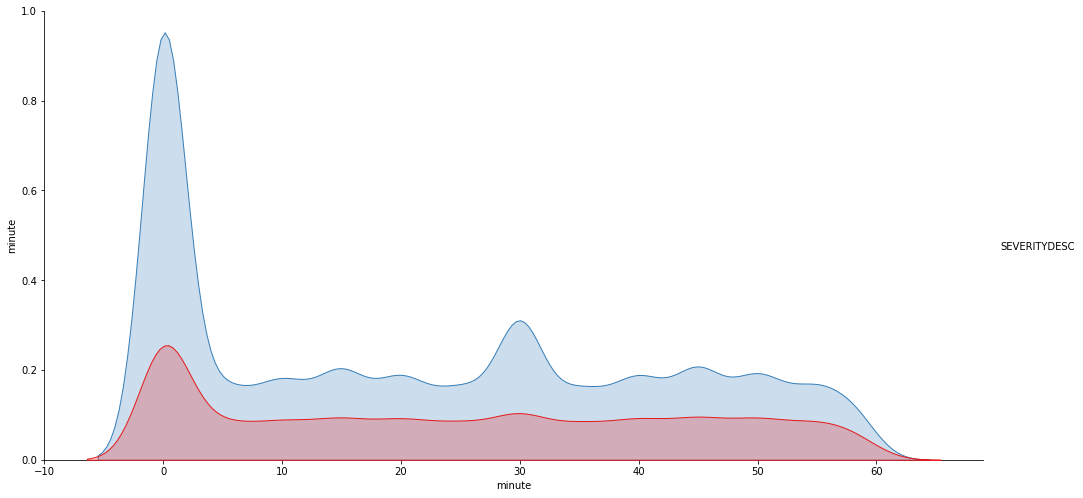

In [68]:
plot_data = df[['SEVERITYDESC','minute']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

#### Next features

In [69]:
df['JUNCTIONTYPE'].value_counts(dropna=False)  #    Category of junction at which collision took place.
                                               #    - Useful data 

Mid-Block (not related to intersection)              87390
At Intersection (intersection related)               62491
Mid-Block (but intersection related)                 22465
Driveway Junction                                    10580
NaN                                                   4193
At Intersection (but not related to intersection)     2071
Ramp Junction                                          143
Unknown                                                  6
Name: JUNCTIONTYPE, dtype: int64

In [70]:
df['JUNCTIONTYPE'].replace(np.nan, "Unknown", inplace=True)

<AxesSubplot:xlabel='year', ylabel='count'>

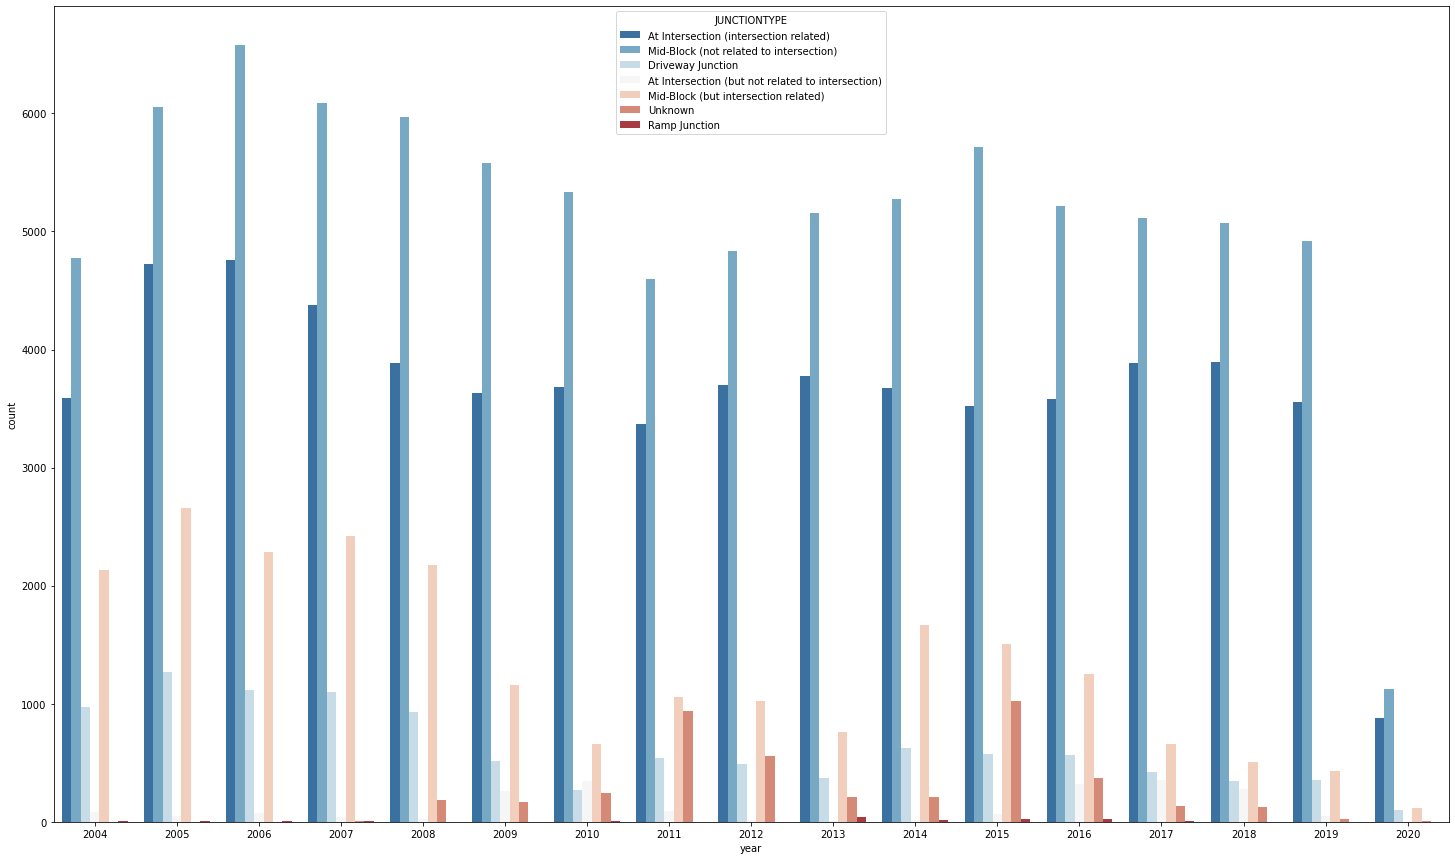

In [71]:
plot_data = df[['JUNCTIONTYPE', 'year']]
plt.figure(figsize=(25,15))
sns.countplot(x='year', hue='JUNCTIONTYPE', data=plot_data, palette='RdBu_r')

In [72]:
df['JUNCTIONTYPE'].replace(to_replace="Mid-Block (not related to intersection)",value=0, inplace=True)
df['JUNCTIONTYPE'].replace(to_replace="At Intersection (intersection related)", value=1, inplace=True)
df['JUNCTIONTYPE'].replace(to_replace="Mid-Block (but intersection related)",   value=2, inplace=True)
df['JUNCTIONTYPE'].replace(to_replace="Driveway Junction",                      value=3, inplace=True)
df['JUNCTIONTYPE'].replace(to_replace="Unknown",                                value=4, inplace=True)
df['JUNCTIONTYPE'].replace(to_replace="Ramp Junction",                          value=5, inplace=True)
df['JUNCTIONTYPE'].replace(to_replace="At Intersection (but not related to intersection)",value=6, inplace=True)

df[['JUNCTIONTYPE']] = df[['JUNCTIONTYPE']].astype("int")

df['JUNCTIONTYPE'].value_counts(dropna=False)

0    87390
1    62491
2    22465
3    10580
4     4199
6     2071
5      143
Name: JUNCTIONTYPE, dtype: int64

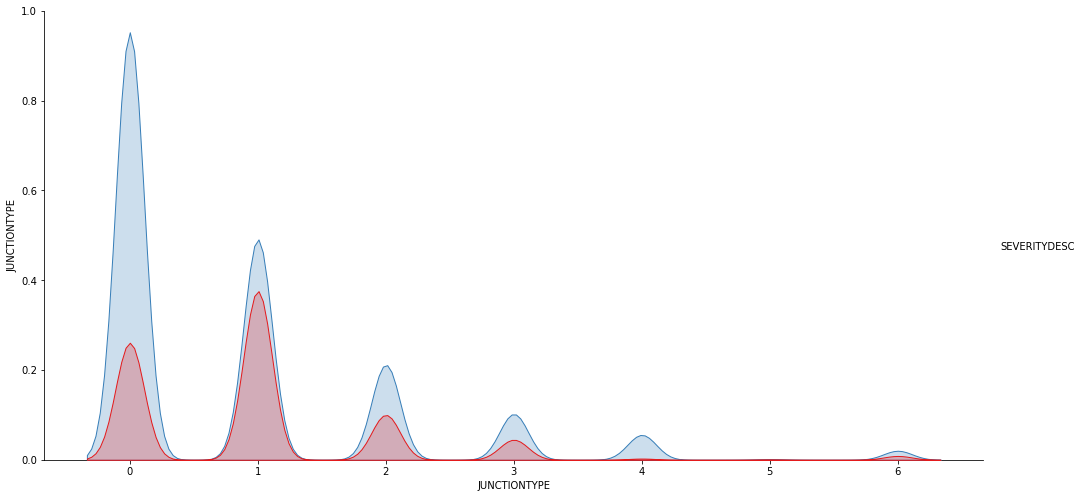

In [73]:
plot_data = df[['SEVERITYDESC','JUNCTIONTYPE']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [74]:
df['SDOT_COLCODE'].value_counts(dropna=False)  # A description of the collision corresponding to the collision code.
                                               #  - Useful data 

11    84538
14    53213
16     9780
28     8631
0      7401
24     6485
13     5780
26     4102
18     3091
15     1597
12     1422
51     1305
29      463
21      181
56      178
27      165
54      137
23      122
48      106
25      102
31      102
34       91
64       75
69       69
33       53
55       50
66       23
22       16
32       12
53        9
44        8
61        7
35        6
58        5
68        4
36        4
46        3
52        2
47        1
Name: SDOT_COLCODE, dtype: int64

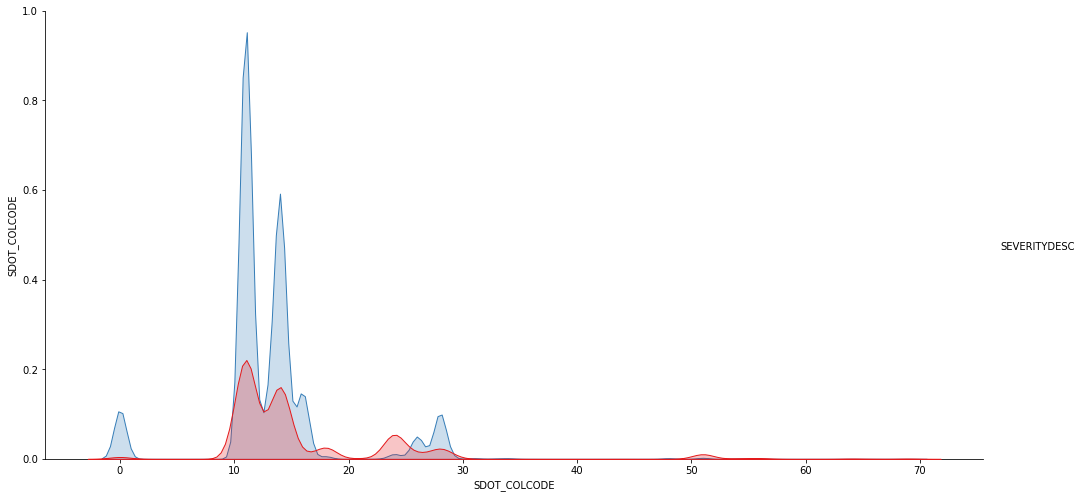

In [75]:
plot_data = df[['SEVERITYDESC', 'SDOT_COLCODE']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [76]:
df['SDOT_COLDESC'].value_counts(dropna=False) # - Useless data (duplicate data)

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          84538
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    53213
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9780
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8631
NOT ENOUGH INFORMATION / NOT APPLICABLE                          7401
MOTOR VEHCILE STRUCK PEDESTRIAN                                  6485
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5780
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4102
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3091
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1597
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1422
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1305
MOTOR VEHICLE OVERTURNED IN ROAD                                  463
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       181
PEDALCYCLIST STRUCK 

In [77]:
# df['SDOT_COLDESC'].unique()

In [78]:
df['INATTENTIONIND'].value_counts(dropna=False) #   Whether or not collision was due to inattention. (Y/N)
                                                # - Useful data  

NaN    160163
Y       29176
Name: INATTENTIONIND, dtype: int64

In [79]:
df['INATTENTIONIND'].replace(np.nan, 0, inplace=True)
df['INATTENTIONIND'].replace(to_replace="Y", value=1, inplace=True)

df[['INATTENTIONIND']] = df[['INATTENTIONIND']].astype("int")

df['INATTENTIONIND'].value_counts(dropna=False)

0    160163
1     29176
Name: INATTENTIONIND, dtype: int64

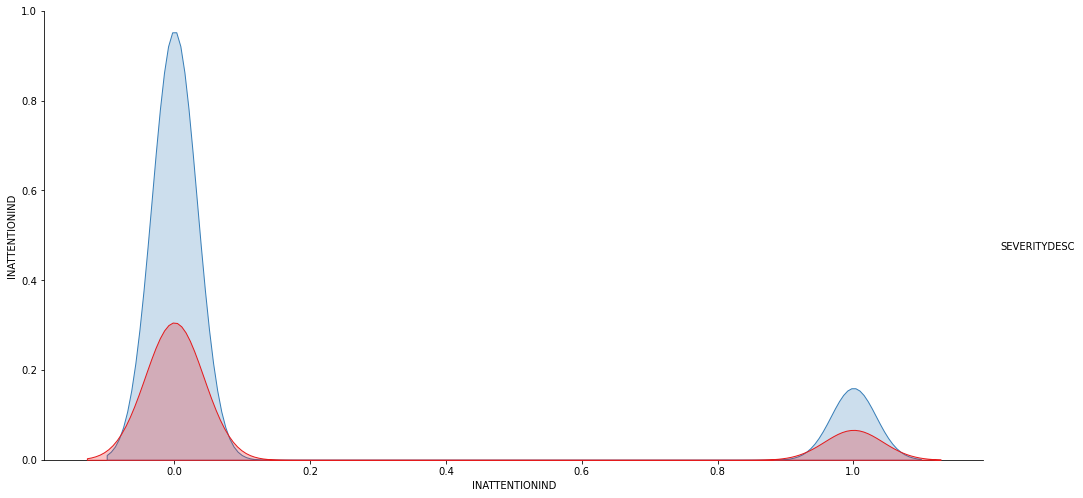

In [80]:
plot_data = df[['SEVERITYDESC', 'INATTENTIONIND']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

<AxesSubplot:xlabel='year', ylabel='count'>

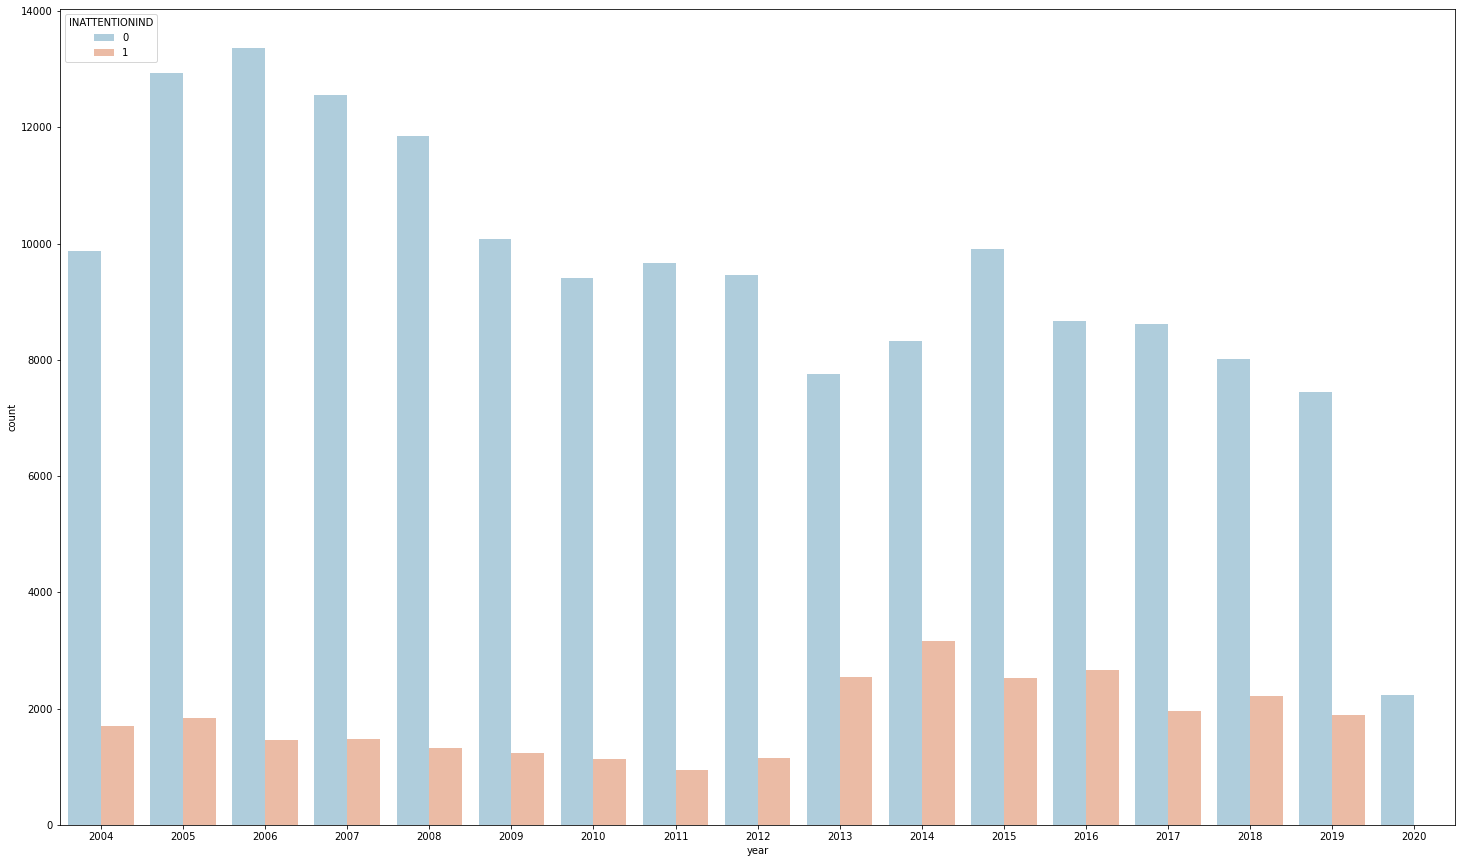

In [81]:
plot_data = df[['INATTENTIONIND', 'year']]
plt.figure(figsize=(25,15))
sns.countplot(x='year', hue='INATTENTIONIND', data=plot_data, palette='RdBu_r')

In [82]:
df['UNDERINFL'].value_counts(dropna=False)   # - Useful data (Not description)

N      97639
0      78082
Y       5002
NaN     4737
1       3879
Name: UNDERINFL, dtype: int64

In [83]:
df['UNDERINFL'].replace(np.nan, "Unknown", inplace=True)

df['UNDERINFL'].replace(to_replace="Unknown",  value=4, inplace=True)
df['UNDERINFL'].replace(to_replace="N",        value=3, inplace=True)
df['UNDERINFL'].replace(to_replace="Y",        value=2, inplace=True)

df[['UNDERINFL']] = df[['UNDERINFL']].astype("int")

df['UNDERINFL'].value_counts(dropna=False)

3    97639
0    78082
2     5002
4     4737
1     3879
Name: UNDERINFL, dtype: int64

In [84]:
df['WEATHER'].value_counts(dropna=False)     # A description of the weather conditions during the time of the collision.
                                             # - Useful data  

Clear                       108959
Raining                      32015
Overcast                     27136
Unknown                      13893
NaN                           4925
Snowing                        894
Other                          773
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [85]:
df['WEATHER'].replace(np.nan, "Unknown", inplace=True)
df['WEATHER'].replace(to_replace="Other", value="Unknown", inplace=True) 

df['WEATHER'].replace(to_replace="Clear",                    value=0, inplace=True)
df['WEATHER'].replace(to_replace="Raining",                  value=1, inplace=True)
df['WEATHER'].replace(to_replace="Overcast",                 value=2, inplace=True)
df['WEATHER'].replace(to_replace="Unknown",                  value=3, inplace=True)
df['WEATHER'].replace(to_replace="Snowing",                  value=4, inplace=True)
df['WEATHER'].replace(to_replace="Fog/Smog/Smoke",           value=5, inplace=True)
df['WEATHER'].replace(to_replace="Sleet/Hail/Freezing Rain", value=6, inplace=True)
df['WEATHER'].replace(to_replace="Blowing Sand/Dirt",        value=7, inplace=True)
df['WEATHER'].replace(to_replace="Severe Crosswind",         value=8, inplace=True)
df['WEATHER'].replace(to_replace="Partly Cloudy",            value=9, inplace=True)


df[['WEATHER']] = df[['WEATHER']].astype("int")

df['WEATHER'].value_counts(dropna=False)

0    108959
1     32015
2     27136
3     19591
4       894
5       553
6       112
7        50
8        24
9         5
Name: WEATHER, dtype: int64

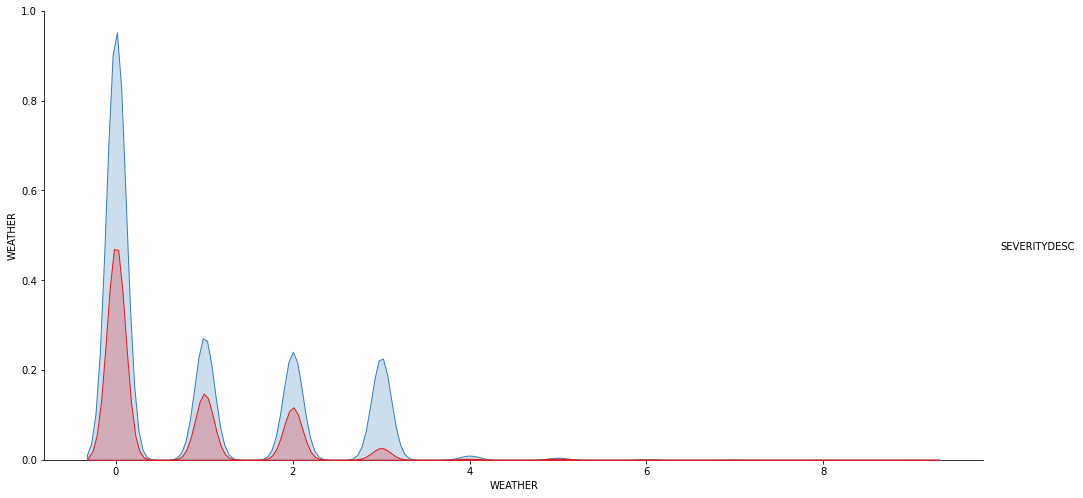

In [86]:
plot_data = df[['SEVERITYDESC', 'WEATHER']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [87]:
df['ROADCOND'].value_counts(dropna=False)    # The condition of the road during the collision.
                                             # - Useful data  

Dry               122076
Wet                46064
Unknown            13839
NaN                 4858
Ice                 1177
Snow/Slush           989
Other                117
Standing Water       102
Sand/Mud/Dirt         64
Oil                   53
Name: ROADCOND, dtype: int64

In [88]:
df['ROADCOND'].replace(np.nan, "Unknown", inplace=True)
df['ROADCOND'].replace(to_replace="Other", value="Unknown", inplace=True)

df['ROADCOND'].replace(to_replace="Dry",            value=0, inplace=True)
df['ROADCOND'].replace(to_replace="Wet",            value=1, inplace=True)
df['ROADCOND'].replace(to_replace="Unknown",        value=2, inplace=True)
df['ROADCOND'].replace(to_replace="Ice",            value=3, inplace=True)
df['ROADCOND'].replace(to_replace="Snow/Slush",     value=4, inplace=True)
df['ROADCOND'].replace(to_replace="Standing Water", value=5, inplace=True)
df['ROADCOND'].replace(to_replace="Sand/Mud/Dirt",  value=6, inplace=True)
df['ROADCOND'].replace(to_replace="Oil",            value=7, inplace=True)


df[['ROADCOND']] = df[['ROADCOND']].astype("int")

df['ROADCOND'].value_counts(dropna=False)

0    122076
1     46064
2     18814
3      1177
4       989
5       102
6        64
7        53
Name: ROADCOND, dtype: int64

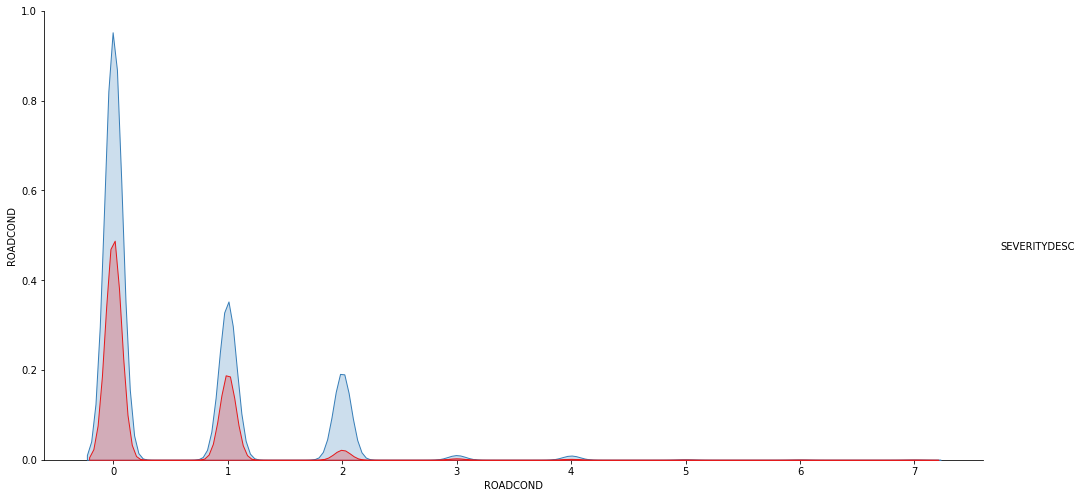

In [89]:
plot_data = df[['SEVERITYDESC', 'ROADCOND']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [90]:
df['LIGHTCOND'].value_counts(dropna=False)   # The light conditions during the collision.
                                             # - Useful data

Daylight                    113582
Dark - Street Lights On      47314
Unknown                      12432
Dusk                          5775
NaN                           5012
Dawn                          2422
Dark - No Street Lights       1451
Dark - Street Lights Off      1152
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [91]:
df['LIGHTCOND'].replace(np.nan, "Unknown", inplace=True)
df['LIGHTCOND'].replace(to_replace="Other", value="Unknown", inplace=True) 

df['LIGHTCOND'].replace(to_replace="Daylight",                 value=0, inplace=True)
df['LIGHTCOND'].replace(to_replace="Dark - Street Lights On",  value=1, inplace=True)
df['LIGHTCOND'].replace(to_replace="Unknown",                  value=2, inplace=True)
df['LIGHTCOND'].replace(to_replace="Dusk",                     value=3, inplace=True)
df['LIGHTCOND'].replace(to_replace="Dawn",                     value=4, inplace=True)
df['LIGHTCOND'].replace(to_replace="Dark - No Street Lights",  value=5, inplace=True)
df['LIGHTCOND'].replace(to_replace="Dark - Street Lights Off", value=6, inplace=True)
df['LIGHTCOND'].replace(to_replace="Dark - Unknown Lighting",  value=7, inplace=True)

df[['LIGHTCOND']] = df[['LIGHTCOND']].astype("int")

df['LIGHTCOND'].value_counts(dropna=False)

0    113582
1     47314
2     17632
3      5775
4      2422
5      1451
6      1152
7        11
Name: LIGHTCOND, dtype: int64

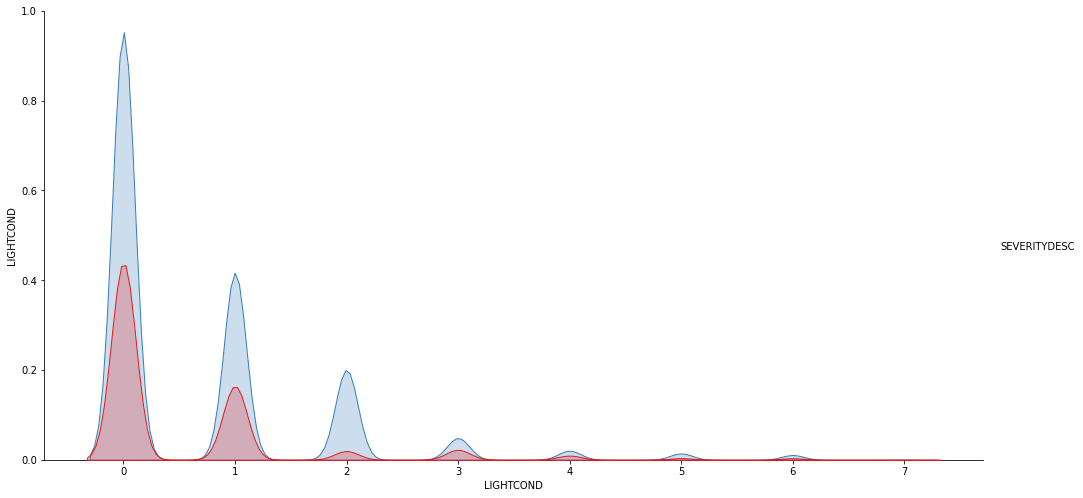

In [92]:
plot_data = df[['SEVERITYDESC', 'LIGHTCOND']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [93]:
df['PEDROWNOTGRNT'].value_counts(dropna=False) #  Whether or not the pedestrian right of way was not granted. (Y/N)
                                               # - Useful data  

NaN    184694
Y        4645
Name: PEDROWNOTGRNT, dtype: int64

In [94]:
df['PEDROWNOTGRNT'].replace(np.nan, 0, inplace=True)
df['PEDROWNOTGRNT'].replace(to_replace="Y", value=1, inplace=True) 

df[['PEDROWNOTGRNT']] = df[['PEDROWNOTGRNT']].astype("int")

df['PEDROWNOTGRNT'].value_counts(dropna=False)

0    184694
1      4645
Name: PEDROWNOTGRNT, dtype: int64

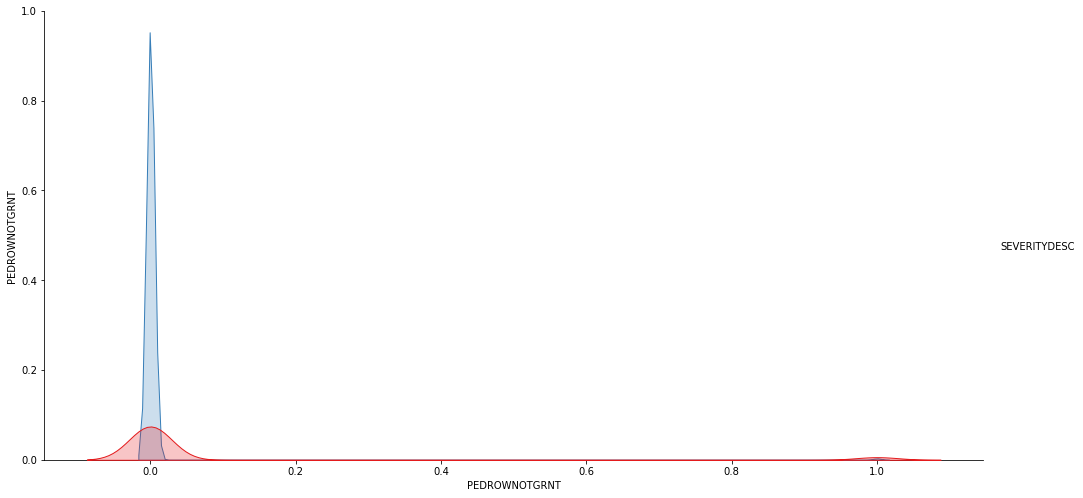

In [95]:
plot_data = df[['SEVERITYDESC', 'PEDROWNOTGRNT']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [96]:
# df['SDOTCOLNUM'].value_counts(dropna=False) #   A number given to the collision by SDOT.
#                                             #   - Useless data    

In [97]:
df['SPEEDING'].value_counts(dropna=False) #  Whether or not speeding was a factor in the collision. (Y/N)
                                          #  - Useful data 

NaN    180619
Y        8720
Name: SPEEDING, dtype: int64

In [98]:
df['SPEEDING'].replace(np.nan, 0, inplace=True)
df['SPEEDING'].replace(to_replace="Y", value=1, inplace=True) 

df[['SPEEDING']] = df[['SPEEDING']].astype("int")

df['SPEEDING'].value_counts(dropna=False)

0    180619
1      8720
Name: SPEEDING, dtype: int64

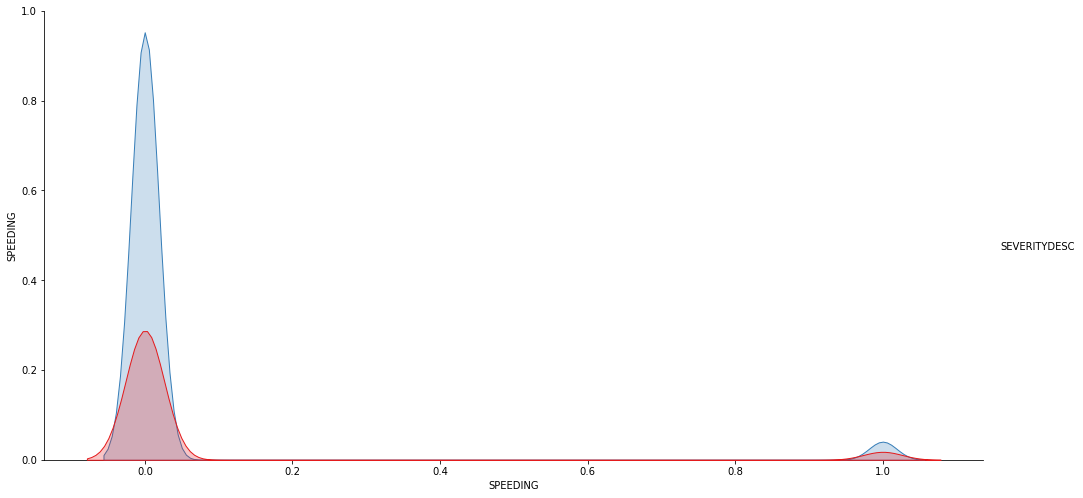

In [99]:
plot_data = df[['SEVERITYDESC', 'SPEEDING']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

In [100]:
# df['ST_COLCODE'].value_counts(dropna=False) #  - Useless data

In [101]:
# df['ST_COLDESC'].value_counts(dropna=False) #  - Useless data (duplicate data of 'ST_COLCODE')  

In [102]:
df['SEGLANEKEY'].value_counts(dropna=False) #       A key for the lane segment in which the collision occurred.
    
                                            #       We can draw the attention of Seattle authorities to the lane segment
        
                                            #       - Useful data 

0        186583
6532         19
6078         16
12162        15
10336        14
          ...  
35157         1
10817         1
15043         1
19064         1
16376         1
Name: SEGLANEKEY, Length: 1950, dtype: int64

In [103]:
df['CROSSWALKKEY'].value_counts(dropna=False) #        A key for the crosswalk at which the collision occurred.
                                              #        - Useful data 

0         185536
523609        17
520838        15
525567        13
521707        10
           ...  
619243         1
521019         1
630862         1
25545          1
522560         1
Name: CROSSWALKKEY, Length: 2194, dtype: int64

In [104]:
df['HITPARKEDCAR'].value_counts(dropna=False) #  Whether or not the collision involved hitting a parked car. (Y/N)
                                              #  - Useful data 

N    182334
Y      7005
Name: HITPARKEDCAR, dtype: int64

In [105]:
df['HITPARKEDCAR'].replace(to_replace="N", value=0, inplace=True)
df['HITPARKEDCAR'].replace(to_replace="Y", value=1, inplace=True) 

df[['HITPARKEDCAR']] = df[['HITPARKEDCAR']].astype("int")

df['HITPARKEDCAR'].value_counts(dropna=False)

0    182334
1      7005
Name: HITPARKEDCAR, dtype: int64

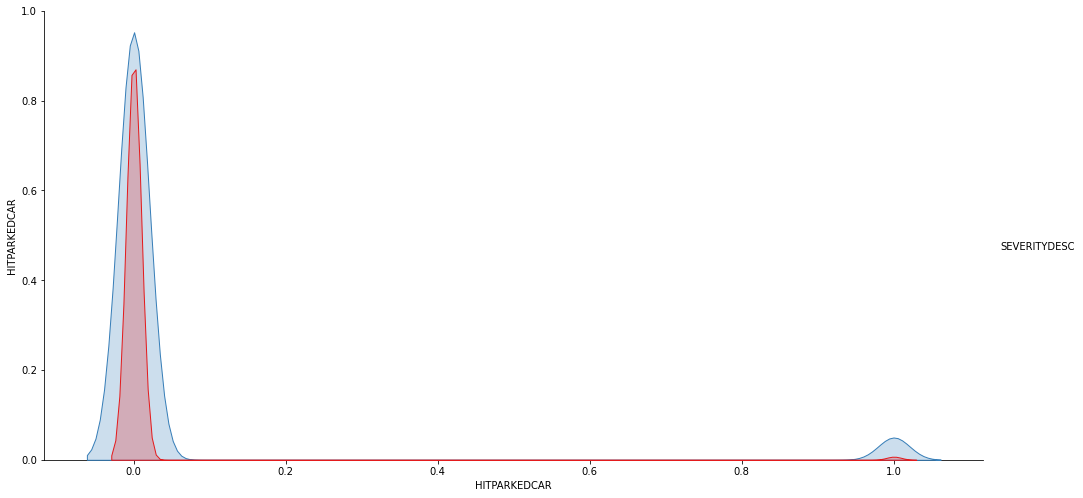

In [106]:
plot_data = df[['SEVERITYDESC', 'HITPARKEDCAR']]
sns.pairplot(plot_data, hue='SEVERITYDESC', palette='Set1', height=7, aspect=2)

> 'SEVERITYCODE' - We can choose this feature as the target in our research   
> 'X' - Useful data  
> 'Y' - Useful data  
> 'OBJECTID' - Useless data  
> 'INCKEY' - Useless data  
> 'COLDETKEY' - Useless data  
> 'REPORTNO' - Useless data  
> 'STATUS' - Useless data  
> 'ADDRTYPE' - Useful data  
> 'INTKEY' - Useful data  
> 'LOCATION' - Useless data(we already have coordinates)  
> 'EXCEPTRSNCODE' - Useless data  
> 'EXCEPTRSNDESC' - Useless data   
> 'SEVERITYCODE.1' - Useless data  
> 'SEVERITYDESC' -  - Useless data (Duplicate data of target)   
> 'COLLISIONTYPE' - Useful data  
> 'PERSONCOUNT' - Useful data  
> 'PEDCOUNT' - Useful data  
> 'PEDCYLCOUNT' - Useful data  
> 'VEHCOUNT' - Useful data  
> 'INCDATE' - Useful data  
> 'INCDTTM' - Useful data  
> 'JUNCTIONTYPE' - Useful data  
> 'SDOT_COLCODE' - Useful data  
> 'SDOT_COLDESC' - Useless data (duplicate data of 'SDOT_COLCODE')  
> 'INATTENTIONIND' - Useful data  
> 'UNDERINFL' - Useful data  
> 'WEATHER'  - Useful data  
> 'ROADCOND' - Useful data  
> 'LIGHTCOND' - Useful data  
> 'PEDROWNOTGRNT' - Useful data  
> 'SDOTCOLNUM' - Useless data  
> 'SPEEDING' - Useful data  
> 'ST_COLCODE' - Useless data  
> 'ST_COLDESC' - Useless data (duplicate data of 'ST_COLCODE')  
> 'SEGLANEKEY' - Useful data  
> 'CROSSWALKKEY' - Useful data  
> 'HITPARKEDCAR' - Useful data  

## Container with useful features

In [107]:
# ['X', 'Y',
# 'ADDRTYPE', 'INTKEY',
# 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT',
# 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
# 'JUNCTIONTYPE', 'SDOT_COLCODE', 'INATTENTIONIND', 
# 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
# 'PEDROWNOTGRNT', 'SPEEDING',
# 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR',
# 'year', 'month', 'day', 'hour', 'minute', 'weekday_name']

_______

# Check Useful Features 


We need to determine the usefulness of each of the features.


Next, we will take only those data that really matter. And apply it in the second part (2nd week) of the project.


### Get Useful Data


In [108]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'year', 'month', 'day',
       'weekday_name', 'hour', 'minute'],
      dtype='object')

In [109]:
useful_df = df[['X', 'Y',
                'ADDRTYPE', 'INTKEY',
                'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT',
                'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
                'JUNCTIONTYPE', 'SDOT_COLCODE', 'INATTENTIONIND', 
                'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
                'PEDROWNOTGRNT', 'SPEEDING',
                'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR',
                'year', 'month', 'day', 'hour', 'minute', 'weekday_name']]

In [110]:
useful_df.columns

Index(['X', 'Y', 'ADDRTYPE', 'INTKEY', 'SEVERITYCODE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR', 'year', 'month', 'day', 'hour', 'minute',
       'weekday_name'],
      dtype='object')

In [111]:
useful_df.dtypes

X                 float64
Y                 float64
ADDRTYPE            int64
INTKEY              int64
SEVERITYCODE        int64
COLLISIONTYPE       int64
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
JUNCTIONTYPE        int64
SDOT_COLCODE        int64
INATTENTIONIND      int64
UNDERINFL           int64
WEATHER             int64
ROADCOND            int64
LIGHTCOND           int64
PEDROWNOTGRNT       int64
SPEEDING            int64
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR        int64
year                int64
month               int64
day                 int64
hour                int64
minute              int64
weekday_name        int64
dtype: object

Using <b>useful_df</b> we declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of useful_df without 'SEVERITYDESC') </li>
    <li> <b> y </b> as the <b> response vector (target = 'SEVERITYDESC') </b> </li>
</ul>

In [112]:
X = df[['X', 'Y',
        'ADDRTYPE', 'INTKEY',
        'COLLISIONTYPE', 'PERSONCOUNT',
        'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
        'JUNCTIONTYPE', 'SDOT_COLCODE', 'INATTENTIONIND', 
        'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
        'PEDROWNOTGRNT', 'SPEEDING',
        'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR',
        'year', 'month', 'day', 'hour', 'minute', 'weekday_name']]

X[0:2]

,X,Y,ADDRTYPE,INTKEY,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,...,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,year,month,day,hour,minute,weekday_name
0,-122.323148,47.703140,1,37475,1,2,0,0,2,1,...,0,0,0,0,2013,3,27,14,54,2
1,-122.347294,47.647172,0,0,4,2,0,0,2,0,...,0,0,0,0,2006,12,20,18,55,2


Now we can fill the target variable.

In [113]:
y = useful_df['SEVERITYCODE']
y[0:2]

0    2
1    1
Name: SEVERITYCODE, dtype: int64

## Setting Up the Decision Tree
    
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.




In [114]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.



In [115]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.1, random_state=3)

## Check

In [116]:
X_trainset.shape

(170405, 27)

In [117]:
y_trainset.shape

(170405,)

In [118]:
X_testset.shape

(18934, 27)

In [119]:
y_testset.shape

(18934,)

## Test Modeling for Understanding of Importance of Features
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>injuryTree</b>.<br>




In [120]:
from sklearn.tree import DecisionTreeClassifier
injuryTree = DecisionTreeClassifier(criterion="entropy")
injuryTree

DecisionTreeClassifier(criterion='entropy')

Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [121]:
injuryTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy')

## Prediction
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.




In [122]:
predTree = injuryTree.predict(X_testset)

We can print out <b>predTree</b> and <b>y_testset</b> if we want to visually compare the prediction to the actual values.



In [123]:
print (predTree [0:5])
print (y_testset [0:5])

[1 1 1 2 2]
28113     1
88403     2
54310     1
178131    1
1054      2
Name: SEVERITYCODE, dtype: int64


## Evaluation
Next, let's check the accuracy of our model.




In [124]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6881271786204711


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.



## Importance of Features

Let's analyze the importance of features.

In [125]:
np.set_printoptions(suppress=True)

importance = pd.Series(injuryTree.feature_importances_, index=X.columns)

sorted_importance = importance.sort_values(ascending=False)

for name, value in zip(X.columns, sorted_importance):
    print(name, value)
    print('')

X 0.18734649913644338

Y 0.11842280556079195

ADDRTYPE 0.11536462233509248

INTKEY 0.08121829707957341

COLLISIONTYPE 0.0802049014891202

PERSONCOUNT 0.06266756018921531

PEDCOUNT 0.059580048219452196

PEDCYLCOUNT 0.05872287955668602

VEHCOUNT 0.04565766690208742

JUNCTIONTYPE 0.04149257277296875

SDOT_COLCODE 0.03238782056796225

INATTENTIONIND 0.018622134483241726

UNDERINFL 0.01820345048586352

WEATHER 0.016697884838210574

ROADCOND 0.013292187433375116

LIGHTCOND 0.012947688803845565

PEDROWNOTGRNT 0.009390193777958739

SPEEDING 0.007627280387143773

SEGLANEKEY 0.0071276323744942005

CROSSWALKKEY 0.004518826949494303

HITPARKEDCAR 0.002120696255633827

year 0.0018188233954839306

month 0.0016456467462129755

day 0.0011941148979018347

hour 0.0011405821964716879

minute 0.0005181729383534248

weekday_name 6.901022692137349e-05



## Correlation between features

In [126]:
useful_df.corr()

,X,Y,ADDRTYPE,INTKEY,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,year,month,day,hour,minute,weekday_name
X,1.000000,-0.160262,0.005886,0.060373,0.010309,0.028655,0.012887,0.011304,-0.001752,-0.012168,...,-0.008163,-0.001618,0.013586,-0.016511,0.010584,0.000202,-0.003820,0.009512,0.013907,-0.008483
Y,-0.160262,1.000000,0.034444,-0.039752,0.017737,-0.007771,-0.013850,0.010178,0.026304,0.017058,...,-0.026607,0.004618,0.009508,-0.012557,-0.025796,0.006603,0.002331,0.017879,-0.016935,-0.005615
ADDRTYPE,0.005886,0.034444,1.000000,0.510210,0.198559,0.221831,0.063192,0.144280,0.083571,-0.078845,...,-0.055719,0.038023,0.177384,-0.130977,0.042121,-0.001686,0.001031,0.036103,0.061217,-0.011767
INTKEY,0.060373,-0.039752,0.510210,1.000000,0.103936,0.119092,0.032091,0.070794,0.042946,-0.046404,...,-0.028355,0.011879,0.106456,-0.065875,0.046290,0.002795,-0.002575,0.020188,0.037520,-0.005759
SEVERITYCODE,0.010309,0.017737,0.198559,0.103936,1.000000,0.254238,0.128866,0.246722,0.214969,-0.058067,...,0.038233,0.104878,0.176014,-0.101637,0.022185,0.004278,-0.000674,0.034193,0.064435,-0.015763
COLLISIONTYPE,0.028655,-0.007771,0.221831,0.119092,0.254238,1.000000,0.006117,0.313481,0.370720,-0.313728,...,0.018096,0.174002,0.242280,-0.188998,0.055272,0.004883,0.003051,0.024314,0.070048,-0.039824
PERSONCOUNT,0.012887,-0.013850,0.063192,0.032091,0.128866,0.006117,1.000000,-0.024764,-0.040317,0.375640,...,0.000746,-0.022093,-0.033410,-0.053431,-0.064625,-0.000415,0.001131,0.043023,0.036299,0.059082
PEDCOUNT,0.011304,0.010178,0.144280,0.070794,0.246722,0.313481,-0.024764,1.000000,-0.017461,-0.265337,...,-0.032266,0.001577,0.567358,-0.035559,0.024770,0.005848,0.004868,0.031781,0.022913,-0.019962
PEDCYLCOUNT,-0.001752,0.026304,0.083571,0.042946,0.214969,0.370720,-0.040317,-0.017461,1.000000,-0.257882,...,-0.019641,0.453828,0.108991,-0.030458,0.034593,0.006921,-0.001132,0.028189,0.027489,-0.025305
VEHCOUNT,-0.012168,0.017058,-0.078845,-0.046404,-0.058067,-0.313728,0.375640,-0.265337,-0.257882,1.000000,...,-0.018259,-0.125028,-0.204243,0.048435,-0.104658,0.013533,0.008296,0.130897,0.085940,0.012938


## Save Useful DataFrame

We can save <b>useful_df</b> to <b>useful_df_car_accident_severity.csv</b> for 2nd Week Capstone Project.

In [127]:
import os
path = os.path.expanduser("~/Documents/useful_df_car_accident_severity.csv")
useful_df.to_csv(path)

# Thanks for attention

Created by [Artyom Kolas ](https://www.linkedin.com/in/artyomkolas/)